In [1]:
%load_ext autoreload
%autoreload 2

from cometml_api import api
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
def filter_exps(experiments, query_params_list):
    if not isinstance(query_params_list, Sequence):
        query_params_list = [query_params_list]

    experiment_keys = defaultdict(list)
    for group, keys in experiments.items():
        for key in keys:
            params = api.get_params(key)

            for query_params in query_params_list:
                add_experiment = True
                for name, value in query_params.items():
                    matched = name in params and params[name] == value
                    add_experiment &= matched

                if add_experiment:
                    experiment_keys[group].append(key)
                    break
    return experiment_keys

In [2]:
api.get_workspaces()

['bayesian-optimization', 'neighthan']

In [3]:
workspace = "bayesian-optimization"
projects = api.get_project_names_and_ids(workspace)
projects

{'dna-binding': '1a8bfadd1efa4ef798eaae80b4814ed2'}

In [4]:
project = projects["dna-binding"]

In [20]:
# def get_...():
group_by = "save_key"
group_values = ["pdts", "mves", "es", "uniform", "bnn", "ei_b1", "mves_lnc_b1", "mves_hsic_b1"]#, "hsic_pdts", "hsic_ms"]
# group_values = []
plot_metrics = ("best_values_ratio", "best_value_ratio")
filter_params = {"dataset": "crx_ref_r1"}
x_name = "step" # or timestamp or offset

grouped_exps = api.get_experiments_grouped_by(project, group_by)
grouped_exps = filter_exps(grouped_exps, filter_params)

In [21]:
plot_data = defaultdict(lambda: defaultdict(list))

for grouped_value, experiments in grouped_exps.items():
    if group_values and grouped_value not in group_values:
        continue

    for experiment in experiments:
        metrics = api.get_metrics(experiment)

        for metric in plot_metrics:
            if metric in metrics:
                plot_data[metric][grouped_value].append(metrics[metric])

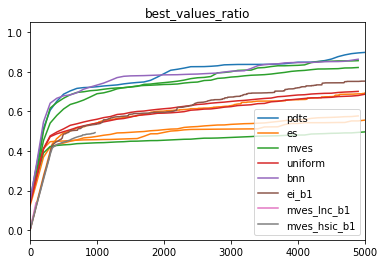

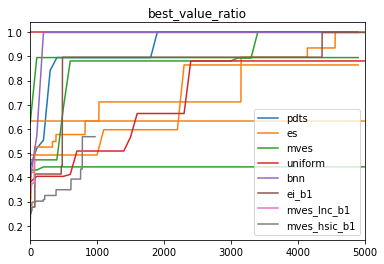

In [22]:
for metric in plot_data:
    plt.figure()
    for i, (group_name, dfs) in enumerate(plot_data[metric].items()):
        for j, df in enumerate(dfs):
            plt.plot(df[x_name], df.value, label=group_name if j == 0 else "", color=f"C{i}")

    plt.legend()
    plt.title(metric)
    plt.xlim(0, 5000)

In [10]:
# def get_...():
group_by = "save_key"
group_values = ["uniform", "ei_b1", "mves_lnc_b1", "mves_hsic_b1"]#, "hsic_pdts", "hsic_ms"]
# group_values = []
plot_metrics = ("best_values_ratio", "best_value_ratio")
filter_params = {"dataset": "crx_ref_r1"}
x_name = "step" # or timestamp or offset

grouped_exps = api.get_experiments_grouped_by(project, group_by)
grouped_exps = filter_exps(grouped_exps, filter_params)

In [11]:
plot_data = defaultdict(lambda: defaultdict(list))

for grouped_value, experiments in grouped_exps.items():
    if group_values and grouped_value not in group_values:
        continue

    for experiment in experiments:
        metrics = api.get_metrics(experiment)

        for metric in plot_metrics:
            if metric in metrics:
                plot_data[metric][grouped_value].append(metrics[metric])

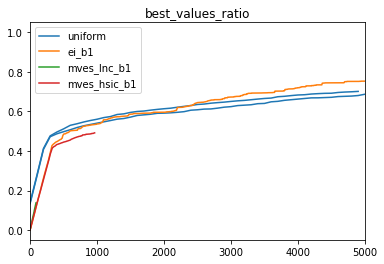

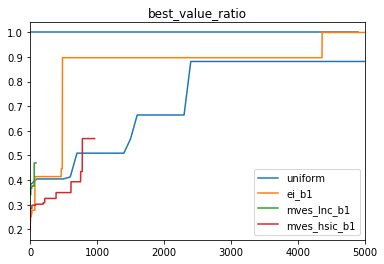

In [19]:
for metric in plot_data:
    plt.figure()
    for i, (group_name, dfs) in enumerate(plot_data[metric].items()):
        for j, df in enumerate(dfs):
            plt.plot(df[x_name], df.value, label=group_name if j == 0 else "", color=f"C{i}")

    plt.legend()
    plt.title(metric)
    plt.xlim(0, 5000)

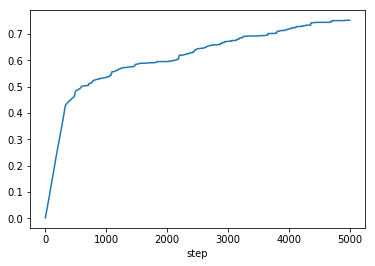

In [17]:
plot_data["best_values_ratio"]["ei_b1"][0].set_index("step").value.plot()

In [25]:
plot_data["best_values_ratio"]["mves_hsic_b1"][0]

,value,step,timestamp,offset
0,0.001166,0,1537248625690,27
1,0.002286,1,1537249192474,36
2,0.003519,2,1537249227349,45
3,0.004707,3,1537249262857,54
4,0.006058,4,1537249298048,63
5,0.007122,5,1537249333429,72
6,0.008739,6,1537249368922,81
7,0.009953,7,1537249404333,90
8,0.011539,8,1537249439708,98
9,0.012873,9,1537249475051,107


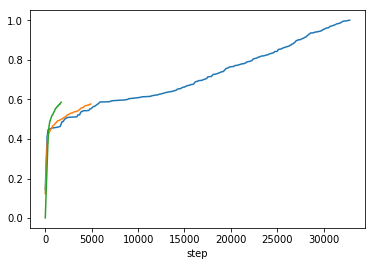

In [38]:
q = plot_data["best_values_ratio"]["es"][0]
q.set_index("step").value.plot()

q = plot_data["best_values_ratio"]["es"][1]
q.set_index("step").value.plot()

q = plot_data["best_values_ratio"]["es"][2]
q.set_index("step").value.plot()

In [79]:
combine = combine_mean_std # Callable[[pd.DataFrame], Tuple[...]]

for metric in plot_data:
    for group_name in plot_data[metric]:
        plot_data[metric][group_name] = combine(plot_data[metric][group_name], x_name)

best_value mi
2
best_value pi
6
fraction_best mi
2
fraction_best pi
6


In [ ]:
# combine: 

In [70]:
def combine_mean_std(dfs, x_name):
    # TODO: should we also have an option to pad the shorter arrays with nans?
    # the only problem is that then the uncertainty will be a bit messed up
    # some places will have std of more samples than others

    min_len = min([len(df) for df in dfs])

    matching_values = [df.value.values[:min_len] for df in dfs]
    x = dfs[0][x_name].values[:min_len]

    mean = np.mean(matching_values, axis=0)
    std = np.std(matching_values, axis=0)
    lower_bound = mean - std
    upper_bound = mean + std
    return x, mean, lower_bound, upper_bound

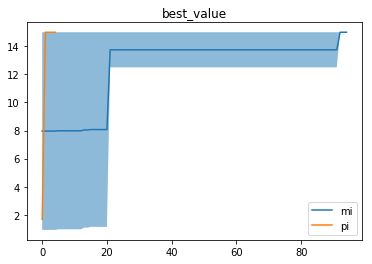

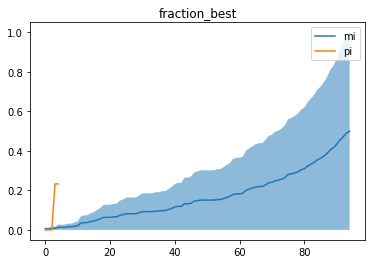

In [83]:
for metric in plot_data:
    plt.figure()
    for group_name, (x, mean, lower_bound, upper_bound) in plot_data[metric].items():
        plt.plot(x, mean, label=group_name)
        plt.fill_between(x, lower_bound, upper_bound, alpha=0.5)

    plt.legend()
    plt.title(metric)

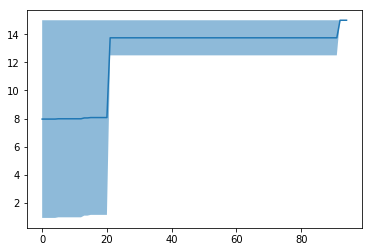

In [11]:
metrics = api.get_metrics(experiments[0])

In [20]:
metrics["best_value"].head()

,value,step,timestamp,offset
0,1.674,0,1536335631754,15
1,15.000,1,1536335906769,19
2,15.000,2,1536336265952,22
3,15.000,3,1536336549185,25
4,15.000,4,1536336842524,28


In [24]:
import pandas as pd

In [ ]:
df = pd.read_csv()

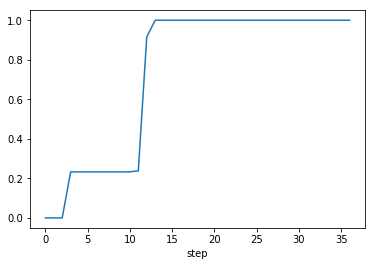

In [23]:
metrics["fraction_best"].set_index("step").value.plot()

In [21]:
%matplotlib inline